# U.S. Medical Insurance Costs

## Importing libraries

In [96]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statistics import mean

## Organizing Data

In [97]:
#reading in the patient data and creating a dictionary with numbered key
with open('insurance.csv') as data_csv:
    csv_data = csv.DictReader(data_csv)
    ordered_list = list(csv_data)
    data_keys = list(range(len(ordered_list)))
    patient_data_dict = {key: None for key in data_keys}
    for key, value in patient_data_dict.items():
        patient_data_dict[key] = ordered_list[key]

patient_data = pd.read_csv(r'insurance.csv')
        
#for data structure reference
print(patient_data_dict[0])
print(patient_data.columns.values)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']


## Basic Statistics

In [98]:
#A block of common statistics using pandas library
average_bmi = patient_data['bmi'].mean()
average_age = patient_data['age'].mean()
median_cost = patient_data['charges'].median()
average_cost = patient_data['charges'].mean()

## Average cost difference between smokers and non smokers

In [99]:
#function for finding average difference in cost for smokers vs non_smokers
def smoking_cost(data_dict):
    smoker_cost = []
    non_smoker_cost = []
    for key, value in data_dict.items():
        if value['smoker'] == 'yes':
            smoker_cost.append(float(value['charges']))
        else:
            non_smoker_cost.append(float(value['charges']))
    average = mean(abs(x - y) for x, y in zip(smoker_cost, non_smoker_cost))
    return print("The average difference in cost for smokers vs non-smokers is $" 
                 + str(round(average, 2)) + '.')

## Average age of those with children vs no children

In [100]:
#function for finding the average age of those with children vs no children
def average_age_parents(data_dict):
    childless_age = []
    parent_age = []
    for key, value in data_dict.items():
        if value['children'] == '0':
            childless_age.append(int(value['age']))
        else:
            parent_age.append(int(value['age']))
    return print("The average age of a parent in the data is " + str(round(mean(parent_age))) 
                 + " while the average age of non parents is " + str(round(mean(childless_age))) + '.')

## Number of smokers vs non-smokers in data

In [103]:
def num_smokers(data_dict):
    smokers = 0
    non_smokers = 0
    for key, value in data_dict.items():
        if value['smoker'] == 'yes':
            smokers +=1
        else:
            non_smokers += 1
    return print(f"There are {smokers} smokers in the dataset, and {non_smokers} non_smokers in the dataset.")

## Most common region

In [107]:
#function for finding the most common region using a dictionary of the data
def most_common_region(data_dict):
    regions = {'southwest':0, 'southeast':0, 'northwest':0, 'northeast':0}
    for key, value in data_dict.items():
        if value['region'] == 'southwest':
            regions['southwest'] += 1
        elif value['region'] == 'southeast':
            regions['southeast'] += 1
        elif value['region'] == 'northwest':
            regions['northwest'] += 1
        else:
            regions['northeast'] += 1
    most_common = max(regions, key = regions.get)
    return print("The region with the most patients in this dataset is the " + str(most_common) + '.')

In [108]:
print('The average BMI is ' + str(round(average_bmi,2)))
print('The average age is ' + str(round(average_age)))
print('The median insurance cost is $' + str(round(median_cost,2)))
print('The average insurance cost is $' + str(round(average_cost,2)))

num_smokers(patient_data_dict)
smoking_cost(patient_data_dict)
average_age_parents(patient_data_dict)  
most_common_region(patient_data_dict)

The average BMI is 30.66
The average age is 39
The median insurance cost is $9382.03
The average insurance cost is $13270.42
There are 274 smokers in the dataset, and 1064 non_smokers in the dataset.
The average difference in cost for smokers vs non-smokers is $23884.76.
The average age of a parent in the data is 40 while the average age of non parents is 38.
The region with the most patients in this dataset is the southeast.


(None,
 {'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324})

## Graphing

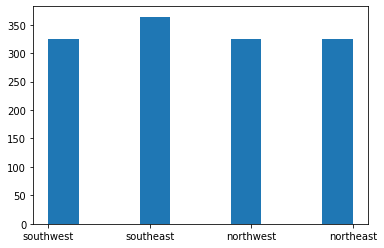

In [94]:
#age vs cost plot function
def data_distribution(data_dict, x):
    x_axis = []
    for key, value in patient_data_dict.items():
        x_axis.append(value[x])
    plt.hist(x_axis)
    plt.show()
    
data_distribution(patient_data_dict, 'region')

In [ ]:
#With the data generated thus far a fer conclusions can be drawn. For one, the data seems to have a fair representation
#of regions. However there are 1064 smokers and only 274 non-smokers in the data which could skew the average costs given the
#massive average difference in cost for a smoker and non-smoker being $23,884.76.